# Import Libraries

In [806]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import talib as ta


# Loading Files

In [807]:
df=pd.read_csv('file.csv')
# df=df*100000
temp=pd.read_csv('MACD_data.csv')

In [808]:

# N1=12
# N2=26
# N3=9
# k1=2/(N1+1)
# k2=2/(N2+1)
# k3=2/(N3+1)
# EMA12=[]
# EMA26=[]
# MACD_SIGNAL=[]
# MACD=[]
# ##############################################################
# sum=0
# for i in range(len(df['close'])):             #Ema 12
#     sum=df['close'][i]+sum
#     if i==11:
#        EMA12.append(sum/12)
#     elif i>=12:
#         EMA12.append((df['close'][i]*k1)+(EMA12[i-1]*(1-k1)))
#     else:
#         EMA12.append(np.nan)
# ##################################################################
# sum=0
# for i in range(len(df['close'])):             #Ema 26
#     sum=df['close'][i]+sum
#     if i==25:
#        EMA26.append(sum/26)
#     elif i>=26:
#         EMA26.append((df['close'][i]*k2)+(EMA26[i-1]*(1-k2)))
#     else:
#         EMA26.append(np.nan)
#     MACD.append(EMA12[i]-EMA26[i]+250)               # Macd line
# df['macd']=MACD
# sum=0
# #################################################################   
# for i in range(len(df['close'])):             #EMA9 OF MACD
  
#     df['macd']=np.nan_to_num(df['macd'])
#     sum=df['macd'][i]+sum

#     if i==33:
#        MACD_SIGNAL.append(sum/9)
#     elif i>=34:
#         MACD_SIGNAL.append((df['macd'][i]*k3)+(MACD_SIGNAL[i-1]*(1-k3)))
#     else:
#         MACD_SIGNAL.append(np.nan)
# df['EMA26']=EMA26
# df['EMA12']=EMA12
# df['macd_signal']=MACD_SIGNAL
# df.head(45)

In [809]:
buy=[]
sell=[]
position_Buy=None
position_Sell=None

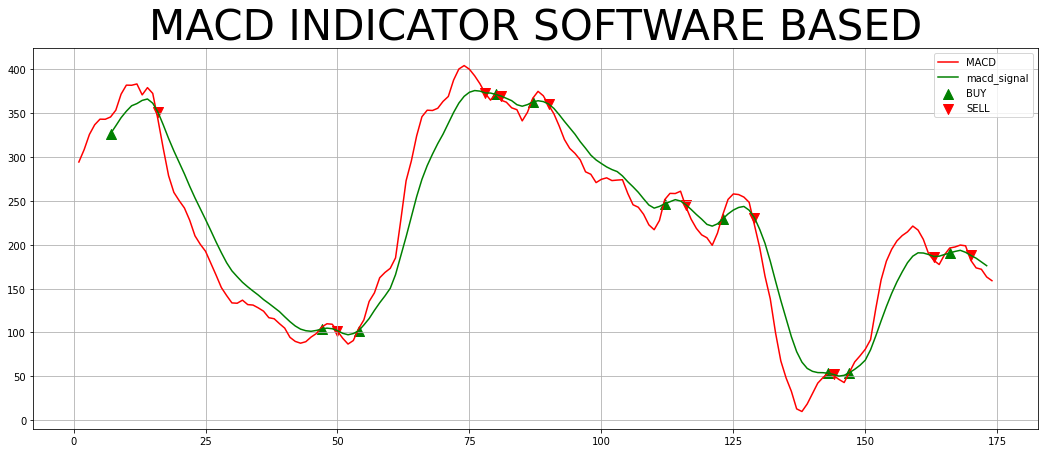

In [810]:
for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['macd'][i] > df['macd_signal'][i] and position_Buy!="Buy":
        buy.append(df['macd_signal'][i])
        sell.append(np.nan)
        position_Buy="Buy"
        position_Sell=None

    elif df['macd'][i]<df['macd_signal'][i] and position_Sell!="Sell":
        sell.append(df['macd_signal'][i])
        buy.append(np.nan)
        position_Sell="Sell"
        position_Buy=None      
    else:
        buy.append(np.nan)
        sell.append(np.nan)

df['buy']=buy
df['sell']=sell
plt.figure(figsize=(18,7))

plt.plot(df['macd'],color='r',label='MACD')
plt.plot(df['macd_signal'],color='g',label='macd_signal')
plt.scatter(df.index,df['buy'],marker='^',color='g',s=100,label='BUY')
plt.scatter(df.index,df['sell'],marker="v",color='r',s=100,label='SELL')
plt.legend()
plt.title('MACD INDICATOR SOFTWARE BASED',size=42)
plt.grid()
# df.to_csv('file.csv',index=False)

In [811]:

buy1=[]
sell1=[]
position_Buy=None
position_Sell=None

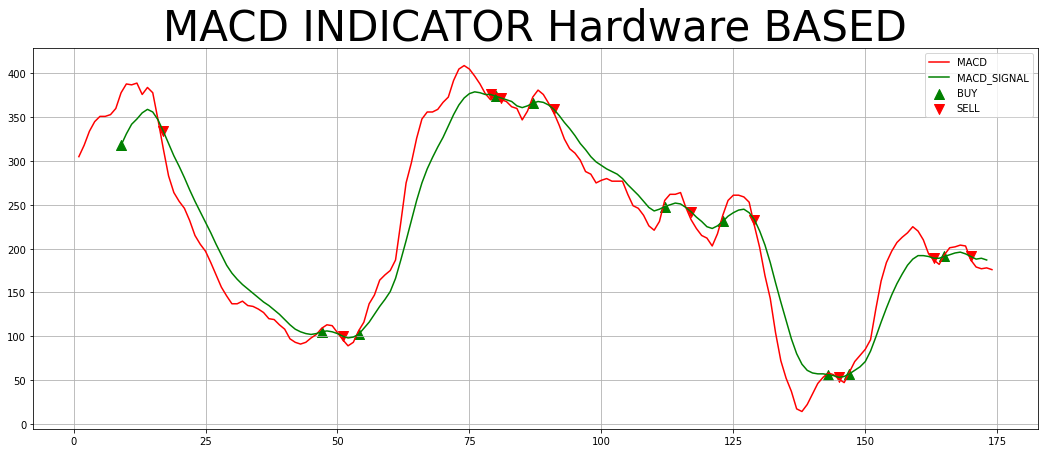

In [812]:
for i in range(len(temp)):
######################################SIGNAL FOR BUY#######################################################

    if temp['MACD'][i] > temp['MACD_SIGNAL'][i] and position_Buy!="Buy":
        buy1.append(temp['MACD_SIGNAL'][i])
        sell1.append(np.nan)
        position_Buy="Buy"
        position_Sell=None

    elif temp['MACD'][i]<temp['MACD_SIGNAL'][i] and position_Sell!="Sell":
        sell1.append(temp['MACD_SIGNAL'][i])
        buy1.append(np.nan)
        position_Sell="Sell"
        position_Buy=None      
    else:
        buy1.append(np.nan)
        sell1.append(np.nan)

temp['buy']=buy1
temp['sell']=sell1
plt.figure(figsize=(18,7))

plt.plot(temp['MACD'],color='r',label='MACD')
plt.plot(temp['MACD_SIGNAL'],color='g',label='MACD_SIGNAL')
plt.scatter(temp.index,temp['buy'],marker='^',color='g',s=100,label='BUY')
plt.scatter(temp.index,temp['sell'],marker="v",color='r',s=100,label='SELL')
plt.legend()
plt.title('MACD INDICATOR Hardware BASED',size=42)
plt.grid()

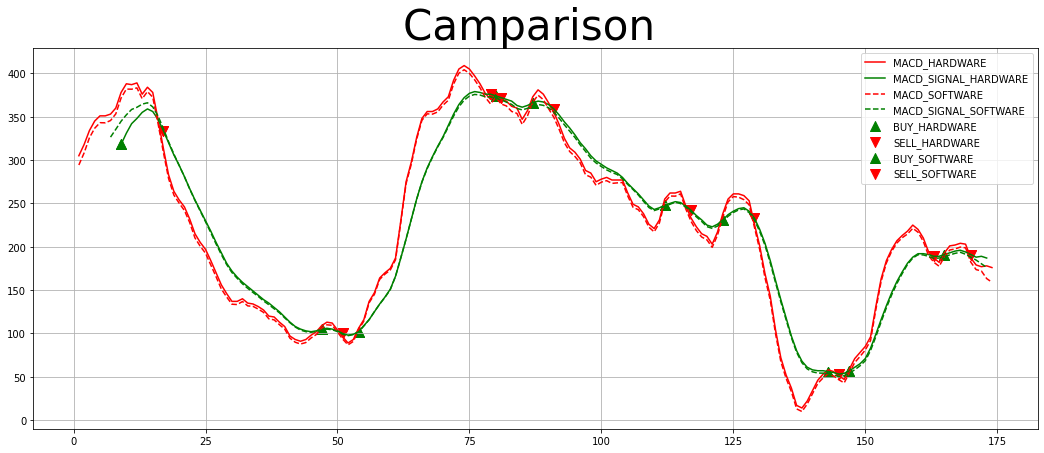

In [813]:
plt.figure(figsize=(18,7))

plt.plot(temp['MACD'],color='r',label='MACD_HARDWARE')
plt.plot(temp['MACD_SIGNAL'],color='g',label='MACD_SIGNAL_HARDWARE')
plt.plot(df['macd'],color='r',linestyle='--',label='MACD_SOFTWARE')
plt.plot(df['macd_signal'],color='g',linestyle='--',label='MACD_SIGNAL_SOFTWARE')
plt.scatter(temp.index,temp['buy'],marker='^',color='g',s=100,label='BUY_HARDWARE')
plt.scatter(temp.index,temp['sell'],marker="v",color='r',s=100,label='SELL_HARDWARE')
plt.scatter(temp.index,temp['buy'],marker='^',color='g',s=100,label='BUY_SOFTWARE')
plt.scatter(temp.index,temp['sell'],marker="v",color='r',s=100,label='SELL_SOFTWARE')
plt.legend()
plt.title('Camparison ',size=42)
plt.grid()

